

---

# **Neural Network Assignment**


---

* The best approach and code structure that was followed and used for your submission
* Make sure that you have at least four different variations of NN models to submit (number of layers and activation functions)
* Use any three classification models covered previously, tune them and compare the results with your best NN model.

In [6]:
!jt -t onedork



---


**The columns in the dataset**


---


1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up upsloping, Flat: flat, Down downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


### **Our target is to classify whether a patient is have Heart Disease or not**

**import required libraries**

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.compose import make_column_transformer


# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore') 

**Check out the Data**

In [436]:
# Load Data
df = pd.read_csv(r"C:\Users\Razan\AppData\Local\Programs\Python\Python310\Scripts\MyWork\heart.csv")

In [437]:
# First 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [438]:
tf.__version__

'2.10.0'

In [439]:
# totat rows and column in the data: / or the size of the data
df.shape

(918, 12)

In [440]:
# info about the  data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [441]:
# describe numerical columns the data:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [442]:
# describe categorical columns 

df.describe(exclude = 'number')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [443]:
#checking duplicate values in dataset
df.duplicated().sum()

0

In [444]:
# column name of the data:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [445]:
#number of unique values in column
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [446]:
# checking null values in dataset
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot: >

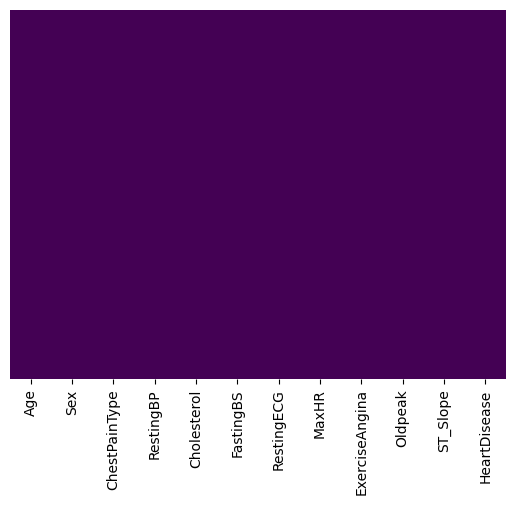

In [447]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **Exploratory Data Analysis [EDA]**

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

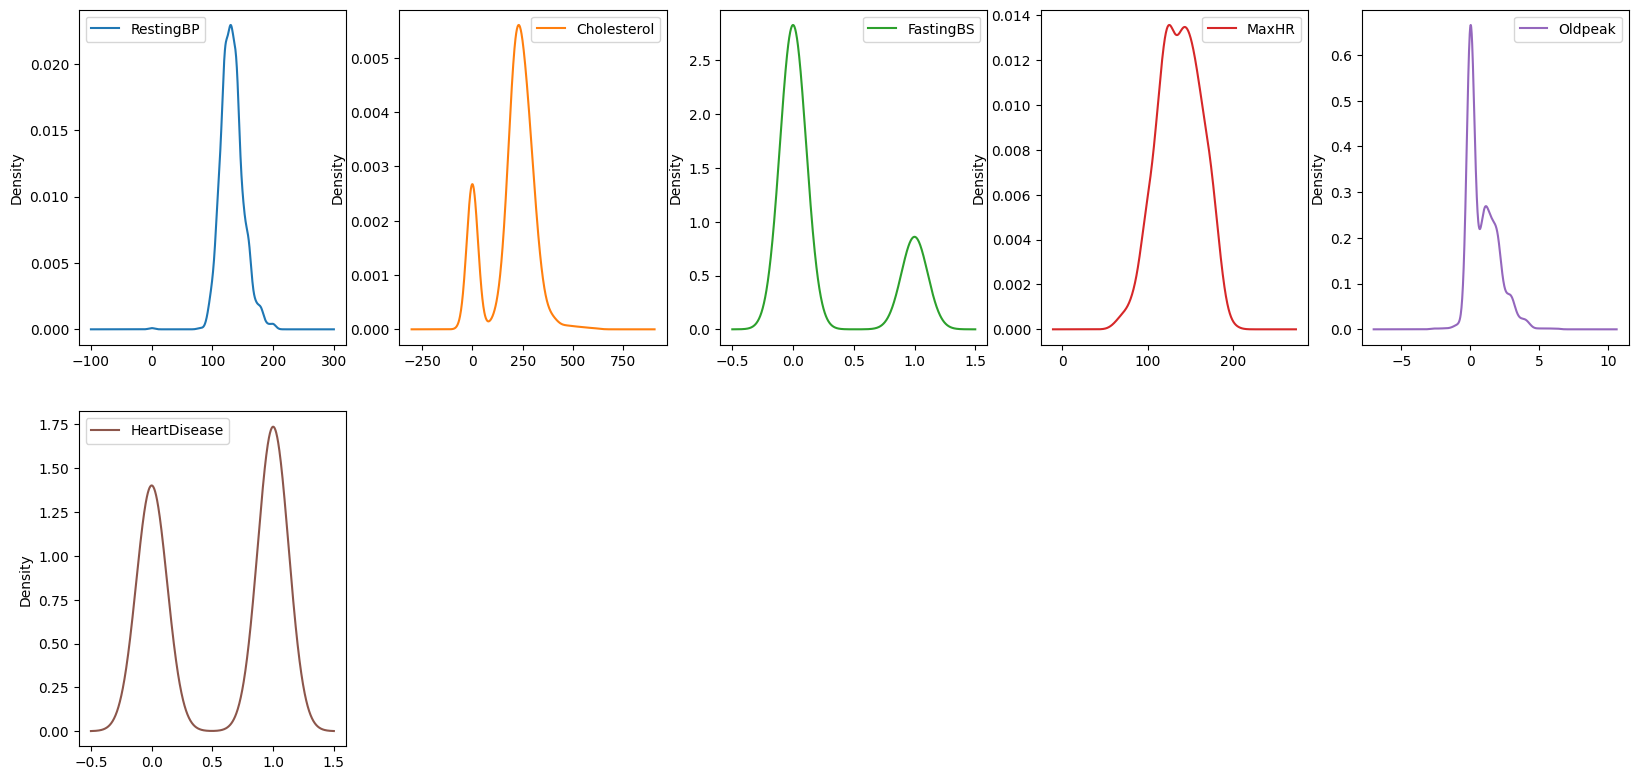

In [448]:
df.iloc[:, 1:].plot.density(subplots=True, 
layout=(4,5), figsize=(20, 20), sharex = False)

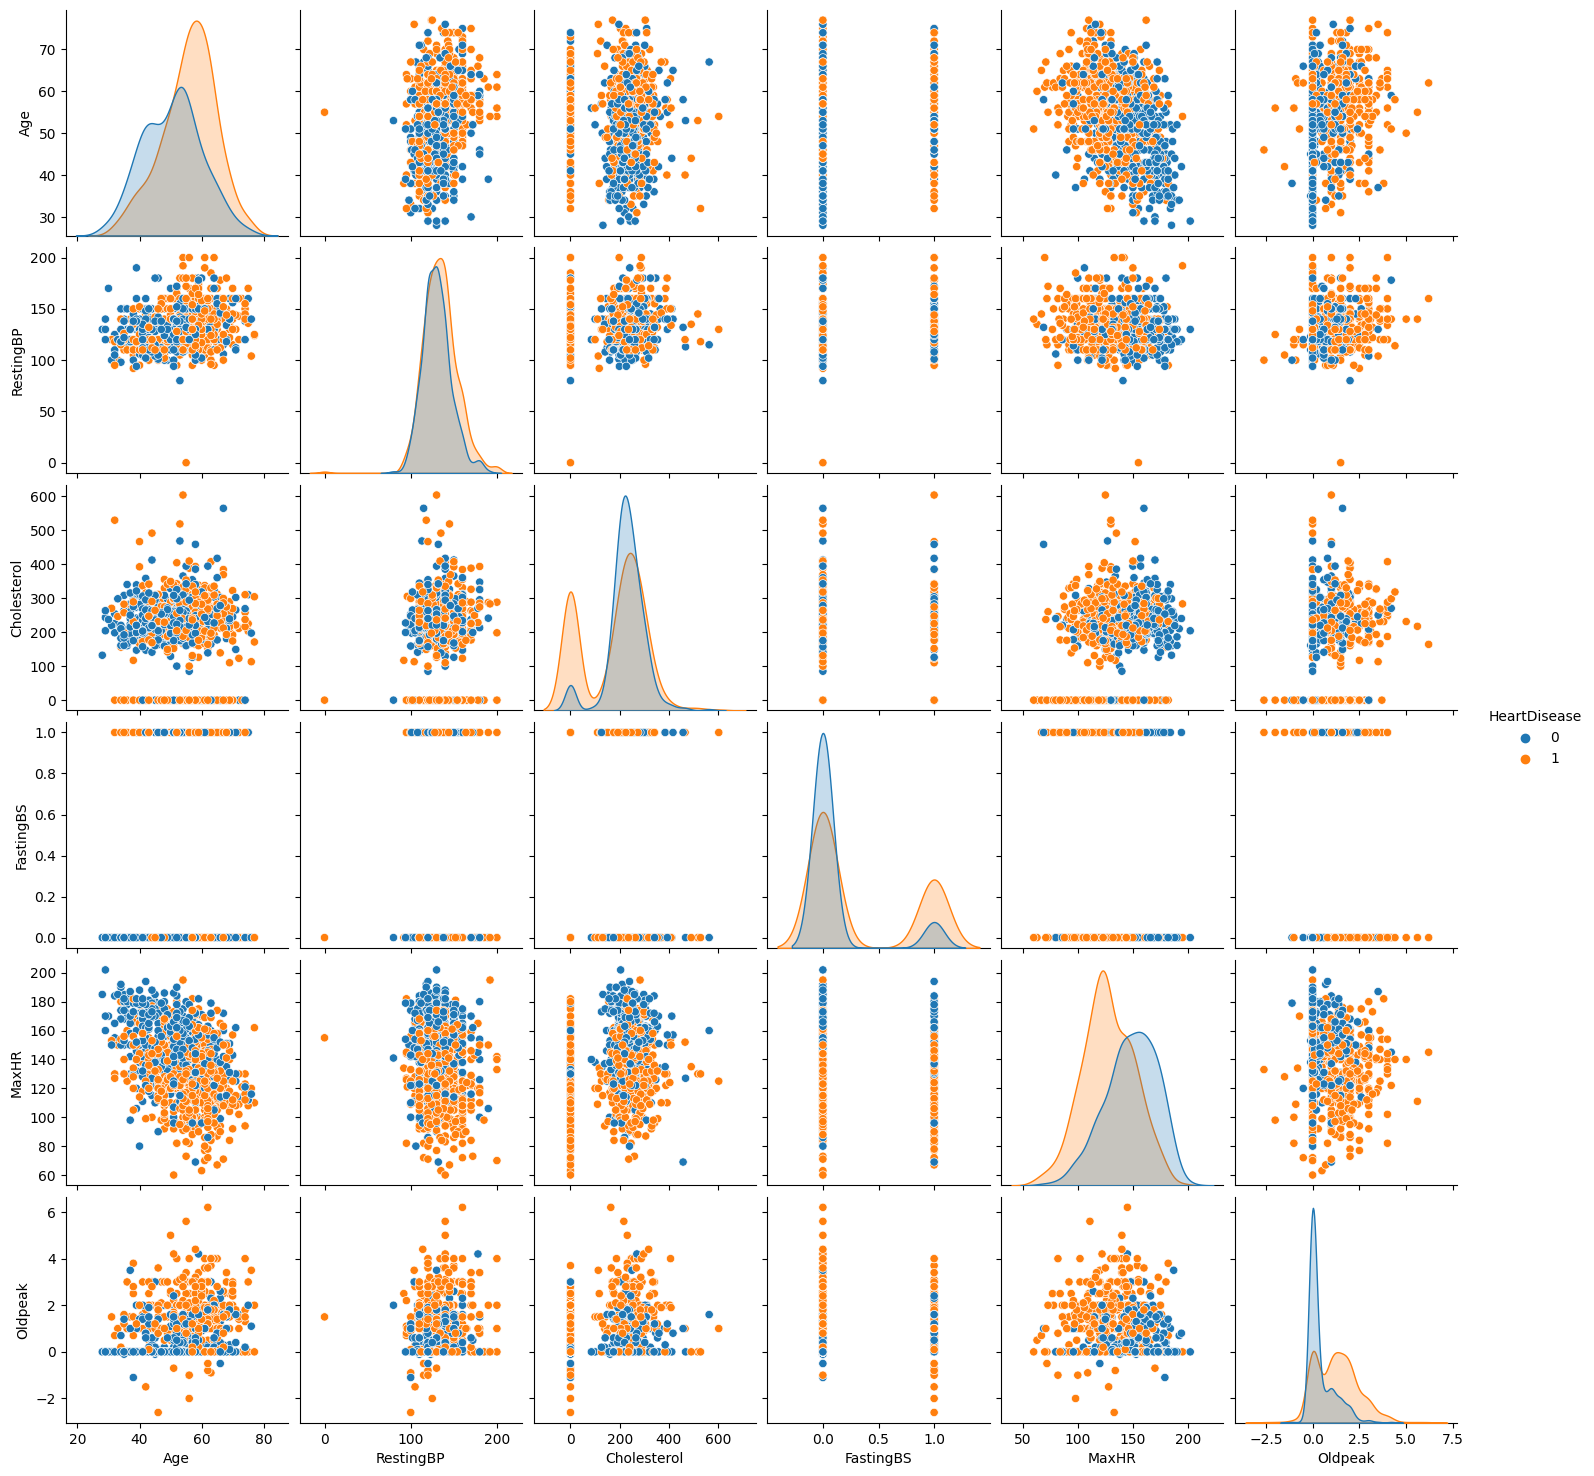

In [450]:
sns.pairplot(df, hue = "HeartDisease")

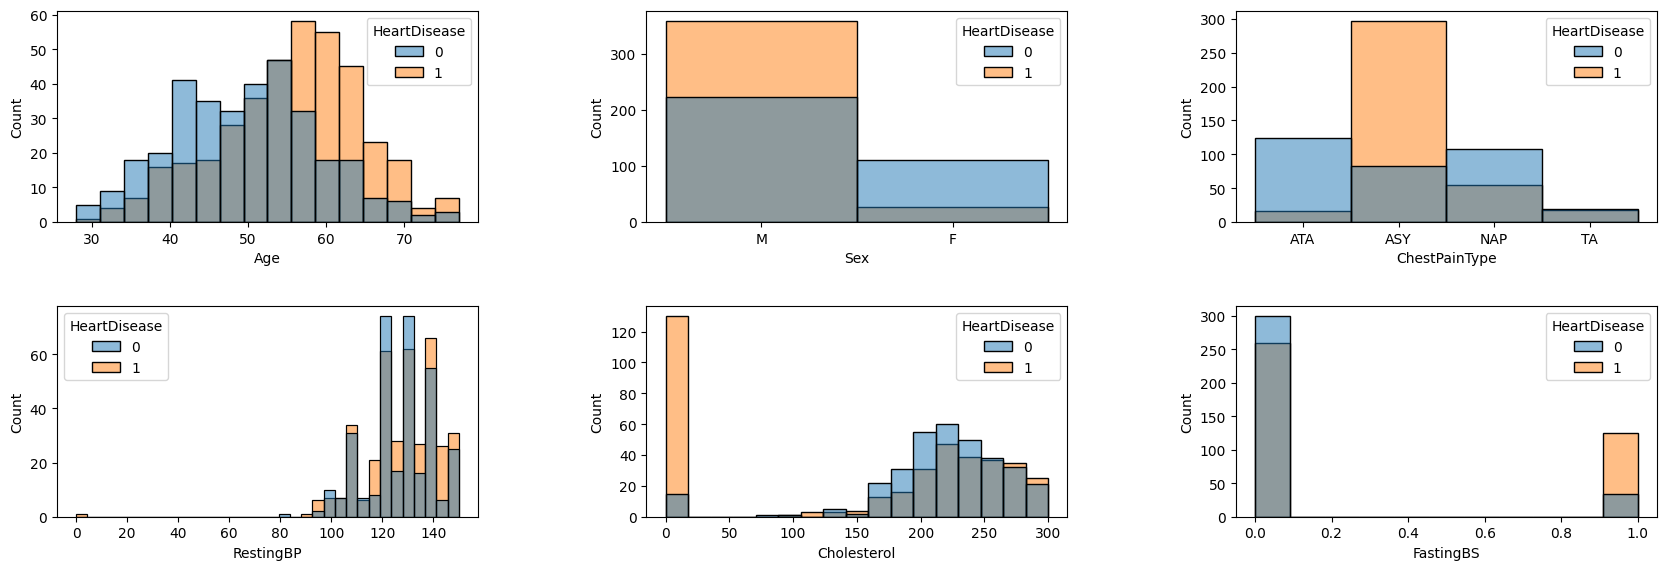

In [535]:
plt.figure(figsize=(20,10))

#Plot 1
plt.subplot(3,3,1)
sns.histplot(x="Age", hue = "HeartDisease", data=df)

#Plot 2

plt.subplot(3,3,2)
sns.histplot(x="Sex", hue="HeartDisease", data=df)

#Plot 3

plt.subplot(3,3,3)
sns.histplot(x="ChestPainType", hue="HeartDisease", data=df)

#Plot 4

plt.subplot(3,3,4)
sns.histplot(x="RestingBP", hue="HeartDisease", data=df)

#Plot 5

plt.subplot(3,3,5)
sns.histplot(x="Cholesterol", hue="HeartDisease", data=df)

#Plot 6

plt.subplot(3,3,6)
sns.histplot(x="FastingBS", hue="HeartDisease", data=df)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

<AxesSubplot: >

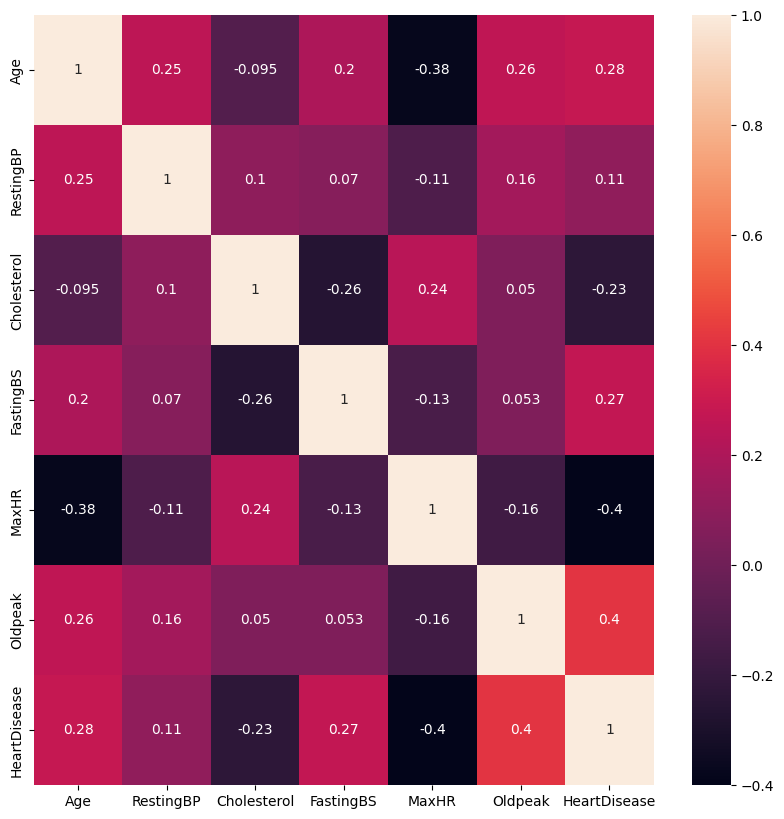

In [451]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

array([[<AxesSubplot: ylabel='Sex'>,
        <AxesSubplot: ylabel='ChestPainType'>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

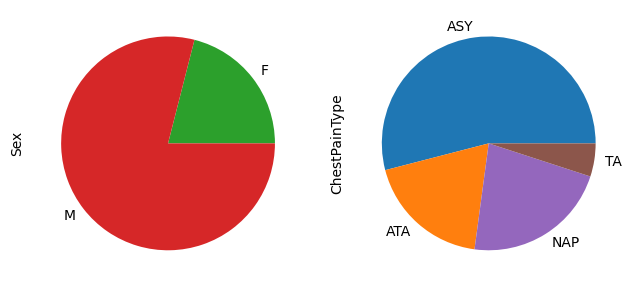

In [449]:
df.iloc[:, 1:3].apply(pd.Series.value_counts).plot.pie(subplots=True, layout=(2, 5), 
figsize=(20, 10), sharex = False, legend = False)

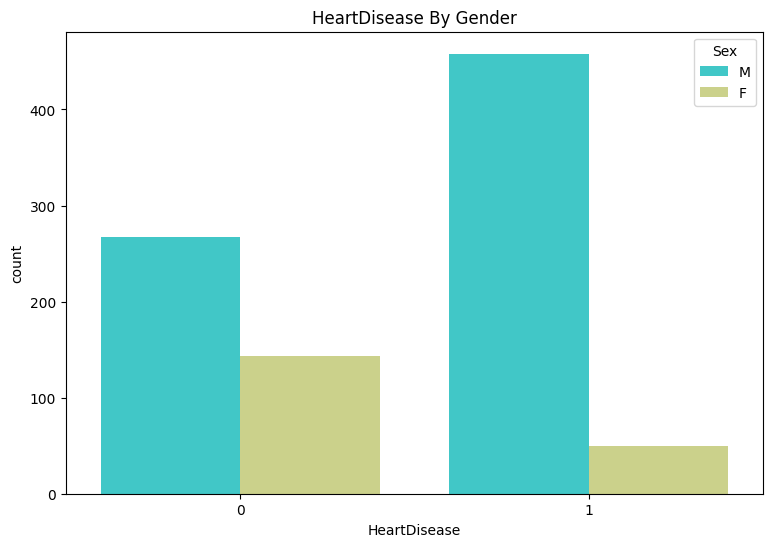

In [452]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='Sex', palette='rainbow')
plt.title('HeartDisease By Gender')
plt.show()

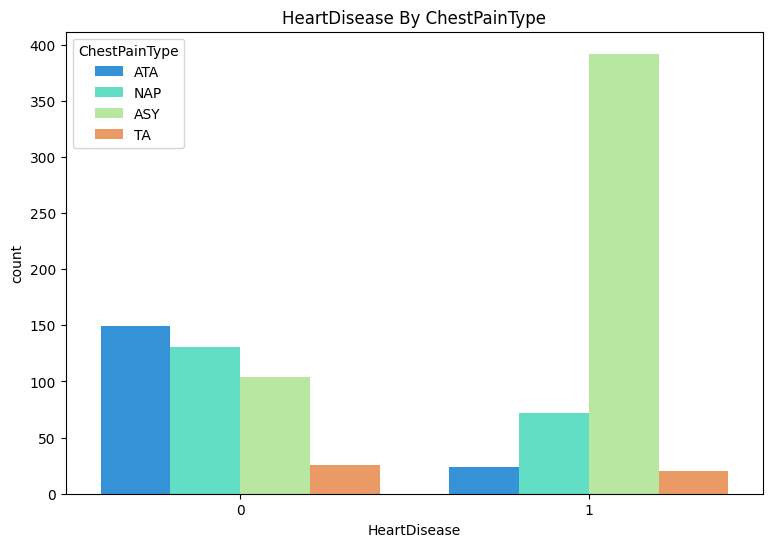

In [453]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='ChestPainType', palette='rainbow')
plt.title('HeartDisease By ChestPainType')
plt.show()

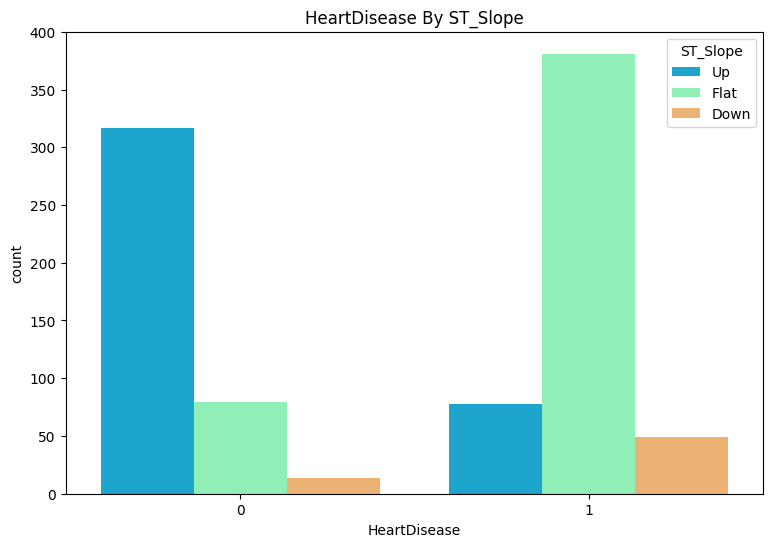

In [454]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='ST_Slope', palette='rainbow')
plt.title('HeartDisease By ST_Slope')
plt.show()

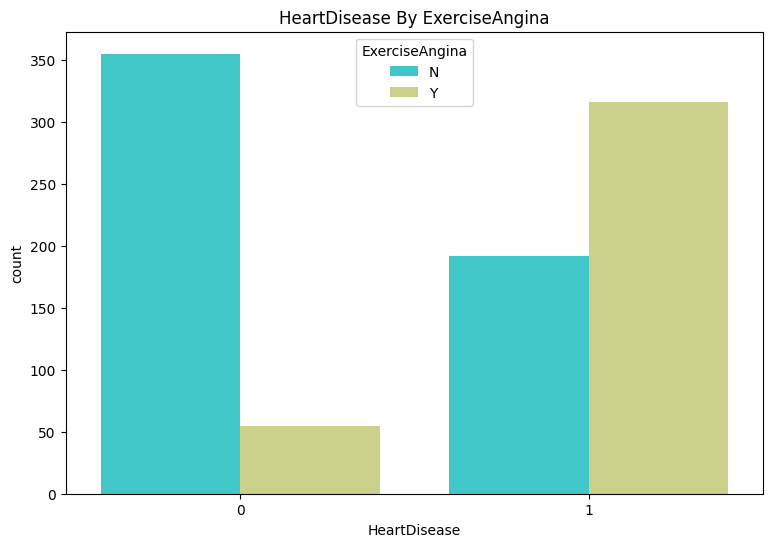

In [455]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='ExerciseAngina', palette='rainbow')
plt.title('HeartDisease By ExerciseAngina')
plt.show()

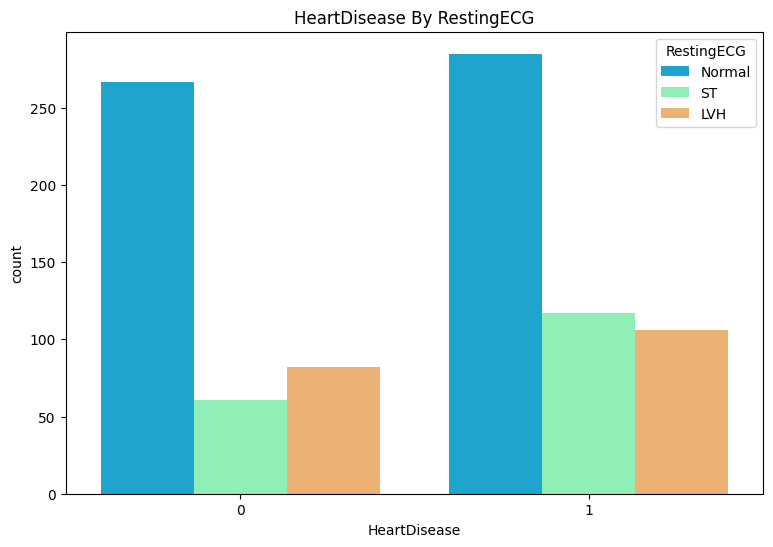

In [456]:
plt.figure(figsize=(9,6))
sns.countplot(x='HeartDisease',data=df, hue='RestingECG', palette='rainbow')
plt.title('HeartDisease By RestingECG')
plt.show()

<AxesSubplot: xlabel='HeartDisease', ylabel='Oldpeak'>

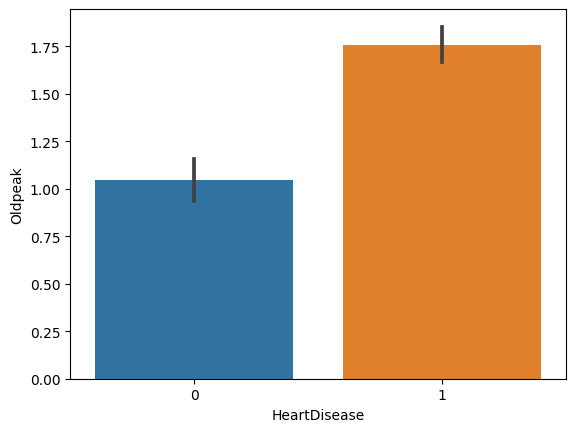

In [457]:
#Distribution of Oldpeak and HeartDisease 
df_HeartDisease = df[df.Oldpeak > 0]
sns.barplot(x="HeartDisease", y="Oldpeak", data=df_HeartDisease)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'RestingBP'),
  Text(2, 0, 'Cholesterol'),
  Text(3, 0, 'FastingBS'),
  Text(4, 0, 'MaxHR'),
  Text(5, 0, 'Oldpeak'),
  Text(6, 0, 'HeartDisease')])

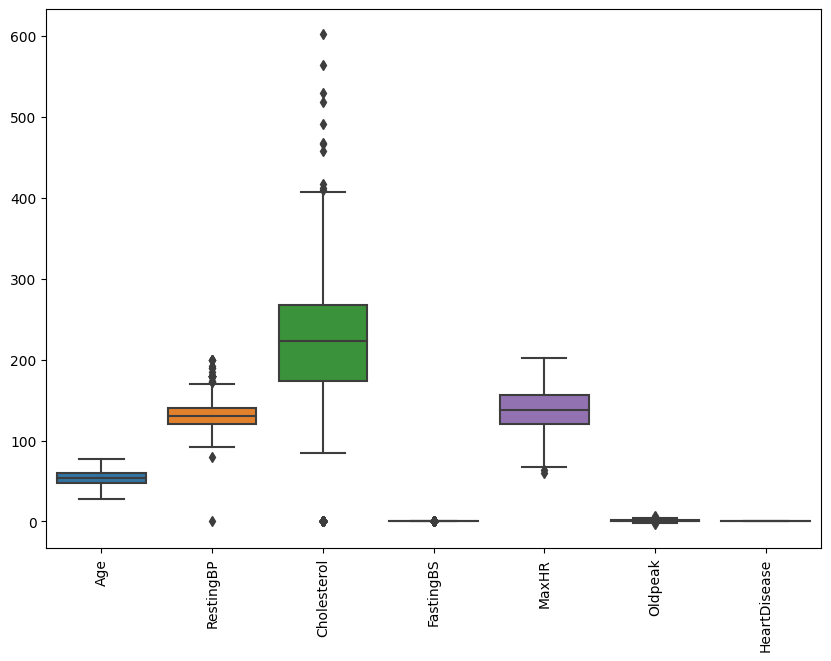

In [458]:
# outlire df
plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)

<AxesSubplot: xlabel='Cholesterol'>

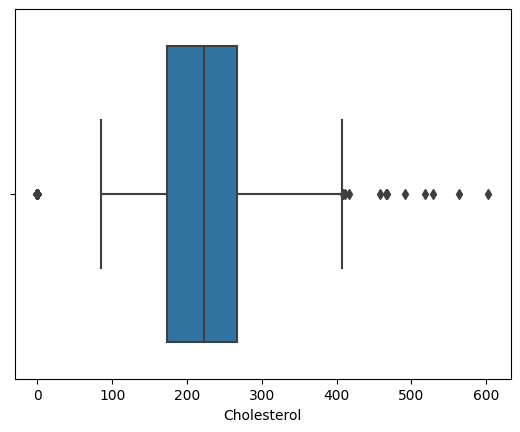

In [459]:
sns.boxplot(x='Cholesterol', data=df)

<AxesSubplot: xlabel='Cholesterol'>

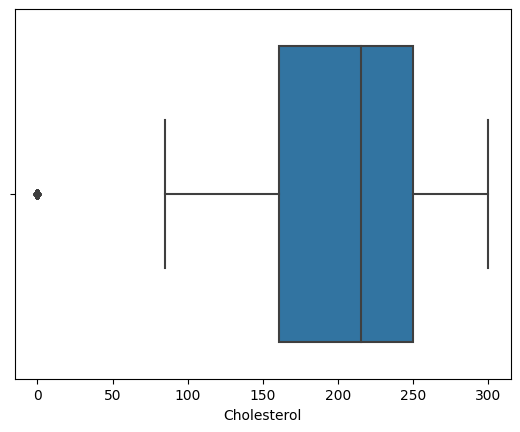

In [460]:
df = df[df['Cholesterol'] <= 300]
sns.boxplot(x='Cholesterol', data=df)

<AxesSubplot: xlabel='RestingBP'>

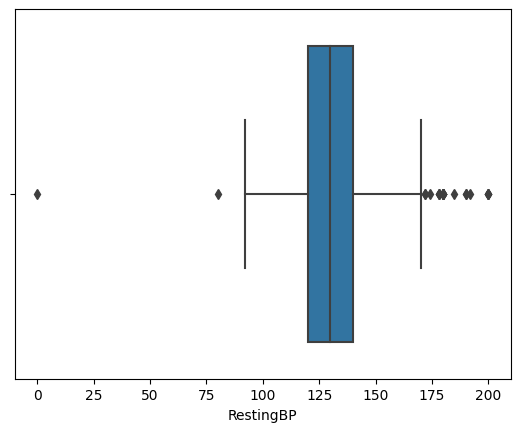

In [461]:
sns.boxplot(x='RestingBP', data=df)

<AxesSubplot: xlabel='RestingBP'>

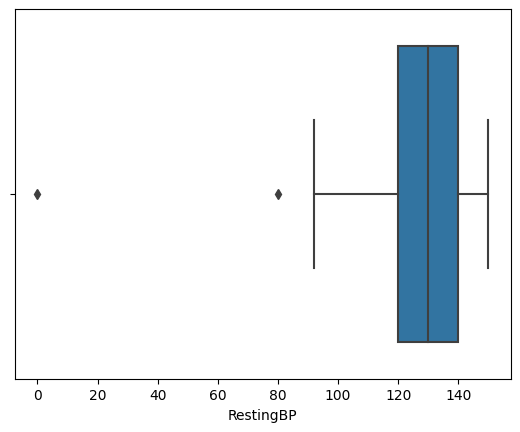

In [462]:
df = df[df['RestingBP'] <= 150]
sns.boxplot(x='RestingBP', data=df)

# **Data Preprocessing and Data Cleaning, Encoding categorical data**

### **Split dataset to features and target**

In [463]:
# Feature set 
# The columns included in the training 
X = df.iloc[:, 0:-1]

# The target will be the last column --> whether the patient have Heart Disease or not
y = df.iloc[:, -1]

In [464]:
pd.DataFrame(X)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [465]:
pd.DataFrame(y)

,HeartDisease
0,0
2,0
3,1
4,0
6,0
...,...
913,1
914,1
915,1
916,1


In [466]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             717 non-null    int64  
 1   Sex             717 non-null    object 
 2   ChestPainType   717 non-null    object 
 3   RestingBP       717 non-null    int64  
 4   Cholesterol     717 non-null    int64  
 5   FastingBS       717 non-null    int64  
 6   RestingECG      717 non-null    object 
 7   MaxHR           717 non-null    int64  
 8   ExerciseAngina  717 non-null    object 
 9   Oldpeak         717 non-null    float64
 10  ST_Slope        717 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 67.2+ KB


### **Column transformer to scale the numeric features_One-hot encoding the categorical features**

In [467]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,6,8,10])], remainder='passthrough')

X = np.array(ct.fit_transform(X))

In [468]:
scaler = StandardScaler()

X= scaler.fit_transform(X)

In [469]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.483817,0.483817,-1.055957,2.030130,-0.540270,-0.233263,-0.483817,0.774885,-0.477221,0.791107,-0.791107,-0.273793,-0.971128,1.116982,-1.350366,0.908022,1.095991,-0.533804,1.367507,-0.804991
1,-0.483817,0.483817,-1.055957,2.030130,-0.540270,-0.233263,-0.483817,-1.290514,2.095466,0.791107,-0.791107,-0.273793,-0.971128,1.116982,-1.667259,0.195867,1.034745,-0.533804,-1.562321,-0.804991
2,2.066896,-2.066896,0.947009,-0.492579,-0.540270,-0.233263,-0.483817,0.774885,-0.477221,-1.264051,1.264051,-0.273793,1.029730,-0.895270,-0.505319,0.765591,0.330417,-0.533804,-1.166398,0.633161
3,-0.483817,0.483817,-1.055957,-0.492579,1.850926,-0.233263,-0.483817,0.774885,-0.477221,0.791107,-0.791107,-0.273793,-0.971128,1.116982,0.128466,1.620177,0.136472,-0.533804,-0.612107,-0.804991
4,2.066896,-2.066896,-1.055957,2.030130,-0.540270,-0.233263,-0.483817,0.774885,-0.477221,0.791107,-0.791107,-0.273793,-0.971128,1.116982,-0.822212,0.195867,0.565193,-0.533804,1.288323,-0.804991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,-0.483817,0.483817,-1.055957,-0.492579,-0.540270,4.287001,-0.483817,0.774885,-0.477221,0.791107,-0.791107,-0.273793,1.029730,-0.895270,-0.822212,-1.228442,0.840799,-0.533804,-0.216184,0.345531
713,-0.483817,0.483817,0.947009,-0.492579,-0.540270,-0.233263,-0.483817,0.774885,-0.477221,0.791107,-0.791107,-0.273793,1.029730,-0.895270,1.607298,1.192884,0.116057,1.873348,0.140147,2.454821
714,-0.483817,0.483817,0.947009,-0.492579,-0.540270,-0.233263,-0.483817,0.774885,-0.477221,-1.264051,1.264051,-0.273793,1.029730,-0.895270,0.445359,0.195867,-0.516817,-0.533804,-0.889253,0.345531
715,2.066896,-2.066896,-1.055957,2.030130,-0.540270,-0.233263,2.066896,-1.290514,-0.477221,0.791107,-0.791107,-0.273793,1.029730,-0.895270,0.445359,0.195867,0.554985,-0.533804,1.446692,-0.804991


### **Splitting the dataset to train and test**

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [471]:
X_train.shape, X_test.shape

((573, 20), (144, 20))

# **Building the ANN -  Version 1**

### Initializing the ANN

In [472]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [473]:
# The 1st hidden layer will have 6 units and the activation function is sigmoid

ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### Adding the second hidden layer

In [474]:
# The 2nd hidden layer will have 6 units and the activation function is sigmoid

ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### Adding the output layer

In [475]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training the ANN**

 **Compiling the ANN**

In [476]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## **Training the ANN on the Training set**

In [477]:
# Note: use y_train.values and not y_train since this will raise an error

version1 = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 0.6990 - accuracy: 0.5288
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5288
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5288
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6690 - accuracy: 0.5288
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.5288
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.5288
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.5428
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6161
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.7138
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.7696
Epoch 11/

18/18 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.8918
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8935
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8935
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8935
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8935
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8935
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8935
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8935
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8918
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8918
Epoch 93/100


### **Predicting the Test set results**

In [478]:
y_pred = ann.predict(X_test)
y_pred1 = (y_pred > 0.5)

5/5 [==============================] - 0s 4ms/step


## **Making the Confusion Matrix**

In [479]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        63
           1       0.91      0.90      0.91        81

    accuracy                           0.90       144
   macro avg       0.89      0.90      0.89       144
weighted avg       0.90      0.90      0.90       144



dict_keys(['loss', 'accuracy'])


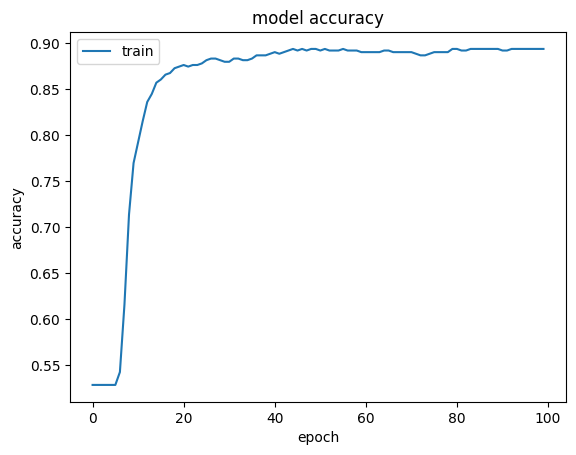

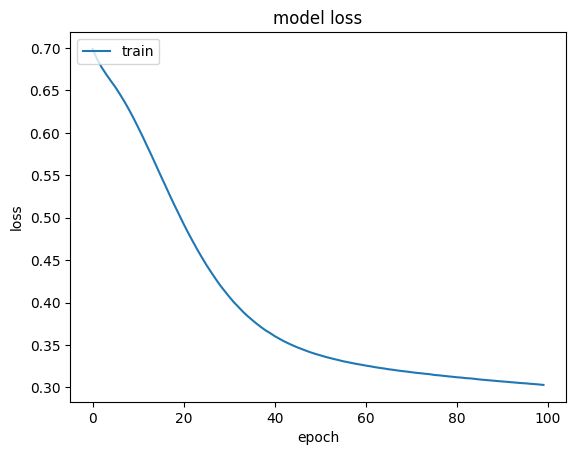

In [481]:
# list all data in history
print(version1.history.keys())
# summarize history for accuracy
plt.plot(version1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(version1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Building the ANN - version 2**

### Initializing the ANN

In [482]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [483]:
# The 1st hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [484]:
# The 1st hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Adding the second hidden layer

### In the second version of ANN model , we put a 10 stages in 2nd hidden layer

In [485]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [486]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [487]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [488]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [489]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [490]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [491]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [492]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [493]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [494]:
# The 2nd hidden layer will have 50 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Adding the output layer

### in the second version of ANN model , we put a 2 stages in output layer

In [495]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [496]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training the ANN**

 **Compiling the ANN**

In [497]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## **Training the ANN on the Training set**

In [498]:
# Note: use y_train.values and not y_train since this will raise an error

version2 = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 50)

Epoch 1/50
18/18 [==============================] - 2s 6ms/step - loss: 0.6939 - accuracy: 0.4712
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6749 - accuracy: 0.6283
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6648 - accuracy: 0.8691
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6627 - accuracy: 0.8499
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.8674
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.8796
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.8848
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6466 - accuracy: 0.8778
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6414 - accuracy: 0.8918
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.8831
Epoch 11/50
18/18 [

### **Predicting the Test set results**

In [499]:
y_pred = ann.predict(X_test)
y_pred2 = (y_pred > 0.5)

5/5 [==============================] - 0s 4ms/step


## **Making the Confusion Matrix**

In [500]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        63
           1       0.90      0.81      0.86        81

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144



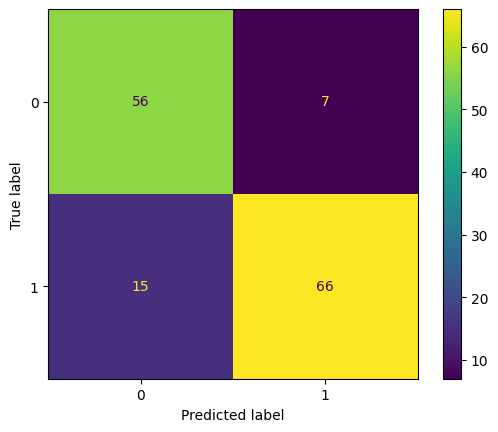

In [501]:
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


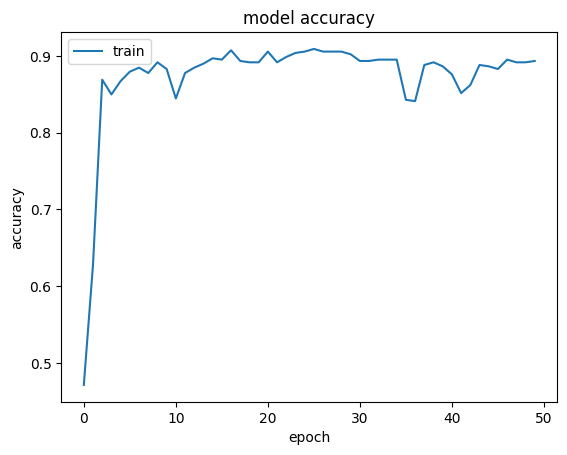

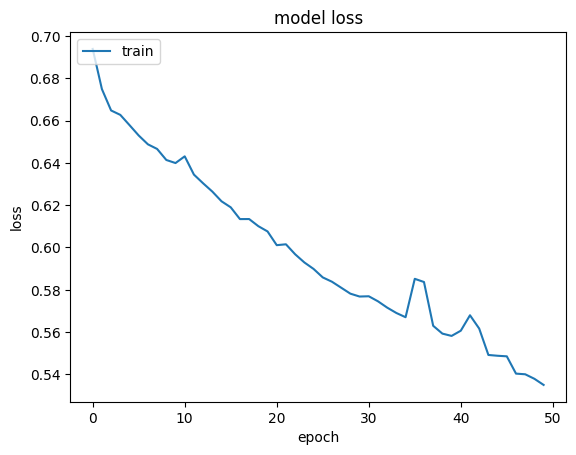

In [502]:
# list all data in history
print(version2.history.keys())
# summarize history for accuracy
plt.plot(version2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(version2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Building the ANN - versions 3**

### Initializing the ANN

In [503]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [504]:
# The 1st hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the second hidden layer

#### In the third version of ANN model , we put a 4 stages in 2nd hidden layer

In [505]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [506]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [507]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [508]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

### Adding the output layer

In [509]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training the ANN**

 **Compiling the ANN**

In [510]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## **Training the ANN on the Training set**

In [511]:
# Note: use y_train.values and not y_train since this will raise an error

version3 = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 0.6744 - accuracy: 0.6178
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.7365
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.7853
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.8063
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4248 - accuracy: 0.8168
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8412
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8464
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8569
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.8778
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8866
Epoch 11/

18/18 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9825
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9843
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9860
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9860
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9878
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9878
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9895
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9913
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9895
Epoch 93/100


### **Predicting the Test set results**

In [512]:
y_pred = ann.predict(X_test)
y_pred3 = (y_pred > 0.5)

5/5 [==============================] - 0s 2ms/step


## **Making the Confusion Matrix**

In [513]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        63
           1       0.88      0.81      0.85        81

    accuracy                           0.83       144
   macro avg       0.83      0.84      0.83       144
weighted avg       0.84      0.83      0.83       144



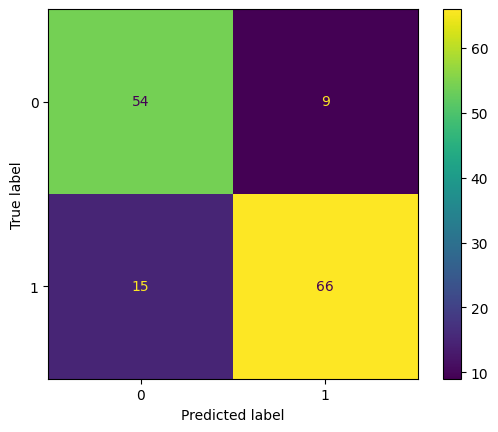

In [514]:
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


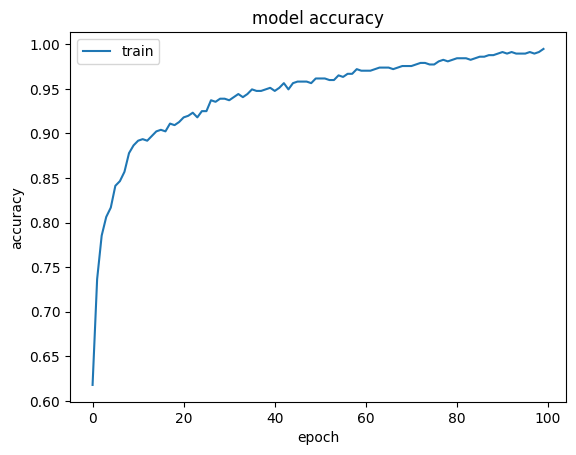

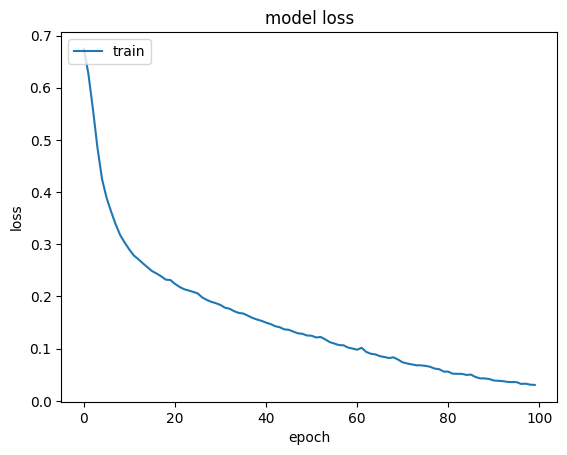

In [515]:
# list all data in history
print(version3.history.keys())
# summarize history for accuracy
plt.plot(version3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(version3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Building the ANN - version 4

In [516]:
ann = tf.keras.models.Sequential()

In [517]:
# The 1st hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

In [518]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

In [519]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [520]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [521]:
# Note: use y_train.values and not y_train since this will raise an error

version4 = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 0.6645 - accuracy: 0.5969
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7784
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8429
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8604
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3565 - accuracy: 0.8674
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8743
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8813
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8866
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8901
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8918
Epoch 11/

18/18 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9634
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9634
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9616
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9668
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9668
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9668
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.9668
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9686
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9686
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0912 - accuracy: 0.9686
Epoch 93/100


In [522]:
y_pred = ann.predict(X_test)
y_pred4 = (y_pred > 0.5)

5/5 [==============================] - 0s 4ms/step


In [523]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        63
           1       0.88      0.86      0.87        81

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144



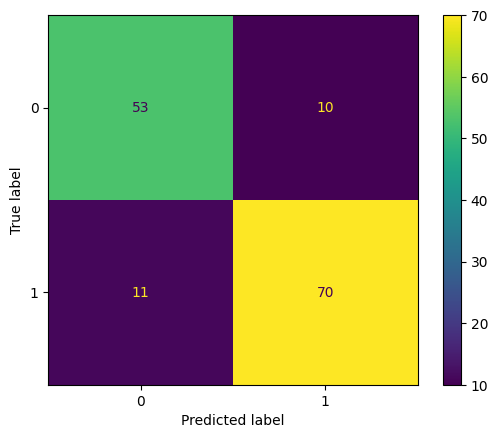

In [524]:
cm = confusion_matrix(y_test, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


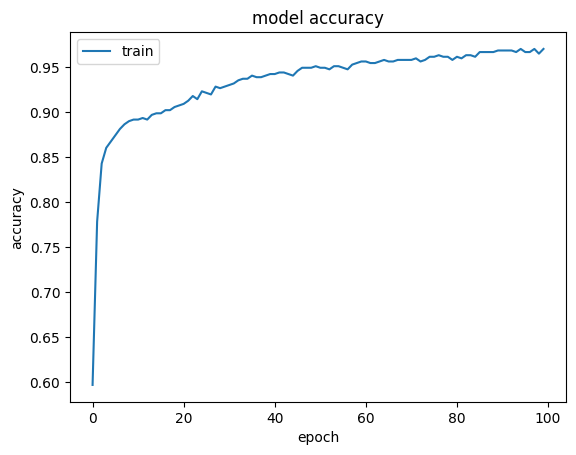

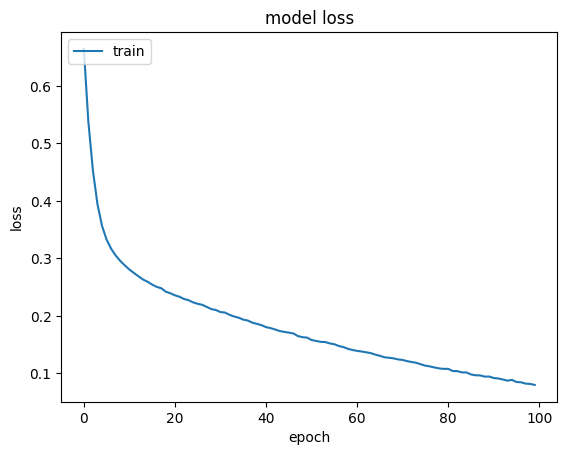

In [525]:
# list all data in history
print(version4.history.keys())
# summarize history for accuracy
plt.plot(version4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(version4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **3 Classification models**

## <font color='red'> 1- Logisic Regression 

In [526]:
# instantiate the model
LR = LogisticRegression(random_state = 0)
# fit the model
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [527]:
#Predict the model 
LR_pred = LR.predict(X_test)
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        63
           1       0.92      0.88      0.90        81

    accuracy                           0.89       144
   macro avg       0.89      0.89      0.89       144
weighted avg       0.89      0.89      0.89       144



## <font color='red'> 2- Decision Tree

In [528]:
# instantiate the model
DT= DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)
# fit the model
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [529]:
#Predict the model 
DT_pred= DT.predict(X_test)
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        63
           1       0.87      0.74      0.80        81

    accuracy                           0.79       144
   macro avg       0.79      0.80      0.79       144
weighted avg       0.80      0.79      0.79       144



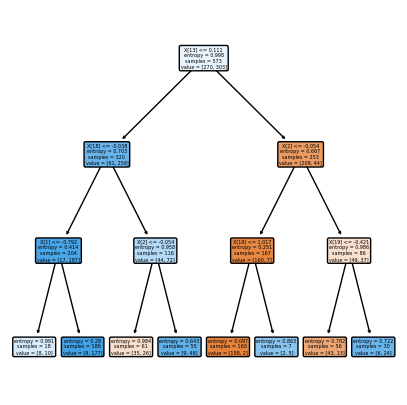

In [530]:
# Plot the decision tree model
plt.figure(figsize=(5,5))
tree.plot_tree(DT, filled=True,rounded=True,);

## <font color='red'> 3-Naive Bayes (Gaussian type)

In [531]:
# instantiate the model
GNB = GaussianNB()
# fit the model
GNB.fit(X_train, y_train)

GaussianNB()

In [532]:
#predict the model 
GNB_pred = GNB.predict(X_test)
print(classification_report(y_test, GNB_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        63
           1       0.89      0.88      0.88        81

    accuracy                           0.87       144
   macro avg       0.87      0.87      0.87       144
weighted avg       0.87      0.87      0.87       144



# **Compare the results of the models with the best NN mode**

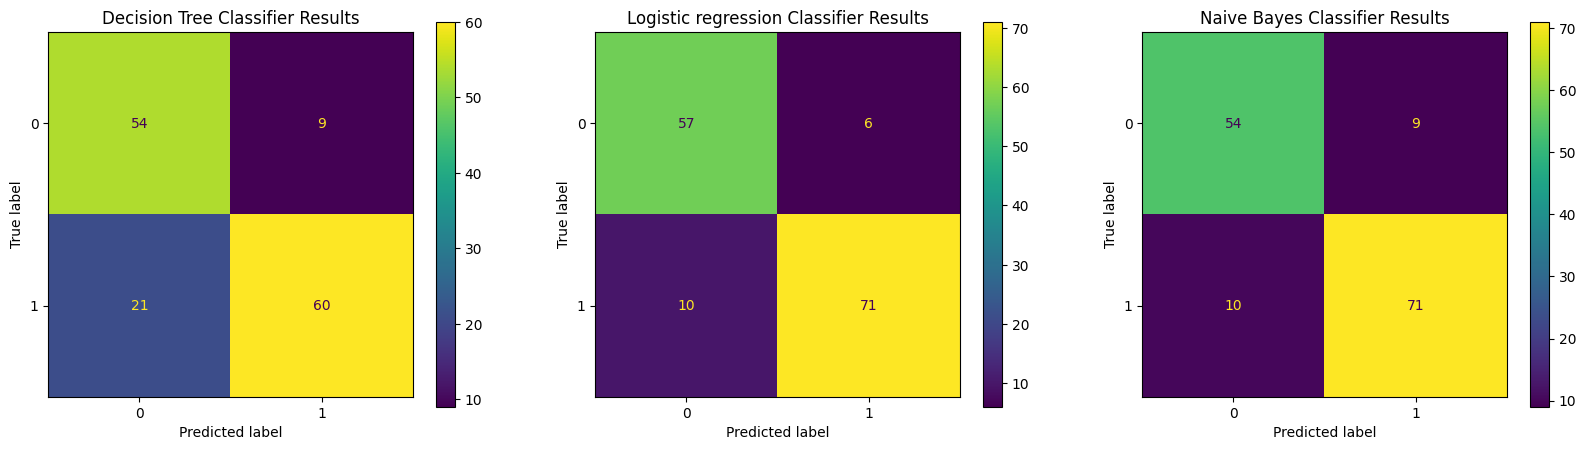

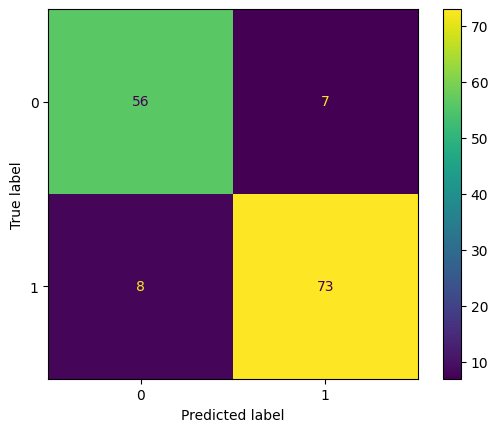

In [533]:
f, axes = plt.subplots(1, 3, figsize=(20, 5))

#Decision Tree
disp_tree = plot_confusion_matrix(DT, X_test, y_test, ax= axes[0])
disp_tree.ax_.set_title('Decision Tree Classifier Results')

#Logistic Regression 
disp_forest = plot_confusion_matrix(LR, X_test, y_test, ax= axes[1])
disp_forest.ax_.set_title('Logistic regression Classifier Results')


#Naive Bayes (Gaussian type)
disp_sv = plot_confusion_matrix(GNB, X_test, y_test, ax= axes[2])
disp_sv.ax_.set_title('Naive Bayes Classifier Results')

cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()



In [534]:
#Decision Tree
val_train = round(DT.score(X_train, y_train),2)*100
val_test = round(DT.score(X_test, y_test),2)*100
print('Decision Tree Classifier Results')
print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%\n')


#Logistic Regression 
val_train = round(LR.score(X_train, y_train),2)*100
val_test = round(LR.score(X_test, y_test),2)*100
print('Logistic regression Classifier Results')
print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}% \n')



#Naive Bayes (Gaussian type)
val_train = round(GNB.score(X_train, y_train),2)*100
val_test = round(GNB.score(X_test, y_test),2)*100
print('GaussianNB Classifier Results')
print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')





Decision Tree Classifier Results
Training Accuracy: 87.0%
Test Set Accuracy: 79.0%

Logistic regression Classifier Results
Training Accuracy: 88.0%
Test Set Accuracy: 89.0% 

GaussianNB Classifier Results
Training Accuracy: 87.0%
Test Set Accuracy: 87.0%
